<a href="https://colab.research.google.com/github/satyarthi-siddharth/MINOR_PROJECT/blob/main/Mini(Minor)_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from PIL import Image

dir_path = '/content/drive/My Drive/Data Science/Images_Data/Weather_Images'

Data = '/content/drive/My Drive/Data Science/Images_Data/Weather_Images'

Weathers = ['Rainy Weather','Summer Weather','Winter Weather']
target = []
flat_data = []

for Weather in Weathers:
  index = Weathers.index(Weather)
  path = os.path.join(Data,Weather)
  for img in os.listdir(path):
    if img.endswith('.jpg'):
      try:
        image = Image.open(os.path.join(path,img))
        image.verify()
        img_array = imread(os.path.join(path,img))
        img_resized = resize(img_array,(150,150,3))
        flat_data.append(img_resized.flatten())
        target.append(index)
      except (IOError, SyntaxError, ValueError) as e:
        os.remove(os.path.join(path,img))


flat_data = np.array(flat_data)
target = np.array(target)

In [43]:
flat_data

array([[0.33079163, 0.40935948, 0.5755817 , ..., 0.30980392, 0.42352941,
        0.64313725],
       [0.54231373, 0.4207451 , 0.33839216, ..., 0.47807843, 0.43690196,
        0.37219608],
       [0.21478431, 0.18912436, 0.20481063, ..., 0.25311094, 0.22745098,
        0.22745098],
       ...,
       [0.72156863, 0.65098039, 0.55686275, ..., 0.20430405, 0.27418641,
        0.36795111],
       [0.77254902, 0.81176471, 0.8627451 , ..., 0.77862745, 0.80215686,
        0.84921569],
       [0.49411765, 0.56862745, 0.68627451, ..., 0.26124183, 0.3396732 ,
        0.43543246]])

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,random_state=101)

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.1,0.01,0.001,0.0001],'kernel':['rbf']}
]

svc = svm.SVC(probability=True)
weather_model = GridSearchCV(svc,param_grid)
weather_model.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [49]:
y_pred = weather_model.predict(x_test)
y_pred

array([1, 2, 1, 1, 2, 0, 0, 1, 0, 2, 1, 0, 0, 2, 2, 2, 2, 0])

In [50]:
y_test

array([0, 2, 1, 1, 2, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0])

In [51]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_pred,y_test)

0.7222222222222222

In [52]:
import pickle
pickle.dump(weather_model,open('Weather_Model.p','wb'))

In [53]:
model = pickle.load(open('Weather_Model.p','rb'))

Enter Your URLhttps://images.theconversation.com/files/20706/original/dkkvsc9j-1361934641.jpg
Predicted Weather:Summer Weather


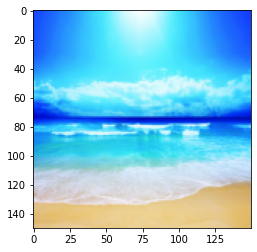

In [54]:
new_flat_data = []
url = input('Enter Your URL')
new_img = imread(url)
new_img_resized = resize(new_img,(150,150,3))
new_flat_data.append(new_img_resized.flatten())
new_flat_data = np.array(new_flat_data)
plt.imshow(new_img_resized)
weather_output = model.predict(new_flat_data)
weather_output = Weathers[weather_output[0]]
print(f'Predicted Weather:{weather_output}')

Enter Your URLhttps://s.w-x.co/util/image/w/ap_18079806210642.jpg
Predicted Weather:Winter Weather


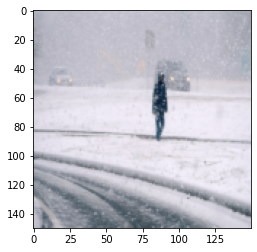

In [55]:
new_flat_data = []
url = input('Enter Your URL')
new_img = imread(url)
new_img_resized = resize(new_img,(150,150,3))
new_flat_data.append(new_img_resized.flatten())
new_flat_data = np.array(new_flat_data)
plt.imshow(new_img_resized)
weather_output = model.predict(new_flat_data)
weather_output = Weathers[weather_output[0]]
print(f'Predicted Weather:{weather_output}')